## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9856136	total: 48.3ms	remaining: 48.3s
1:	learn: 0.9649062	total: 49.5ms	remaining: 24.7s
2:	learn: 0.9436912	total: 50.8ms	remaining: 16.9s
3:	learn: 0.9248848	total: 51.9ms	remaining: 12.9s
4:	learn: 0.9086176	total: 53ms	remaining: 10.6s
5:	learn: 0.8912423	total: 54.1ms	remaining: 8.96s
6:	learn: 0.8753745	total: 55.2ms	remaining: 7.83s
7:	learn: 0.8587320	total: 56.6ms	remaining: 7.02s
8:	learn: 0.8433826	total: 57.8ms	remaining: 6.36s
9:	learn: 0.8257197	total: 58.8ms	remaining: 5.82s
10:	learn: 0.8098918	total: 59.9ms	remaining: 5.38s
11:	learn: 0.7954720	total: 61.2ms	remaining: 5.04s
12:	learn: 0.7795095	total: 62.3ms	remaining: 4.73s
13:	learn: 0.7646956	total: 63.4ms	remaining: 4.46s
14:	learn: 0.7503694	total: 64.4ms	remaining: 4.22s
15:	learn: 0.7372965	total: 65.3ms	remaining: 4.02s
16:	learn: 0.7244950	total: 66.3ms	remaining: 3.83s
17:	learn: 0.7125875	total: 67.4ms	remaining: 3.68s
18:	learn: 0.6994611	total: 68.4ms	remaining: 3

87:	learn: 0.3318255	total: 139ms	remaining: 1.44s
88:	learn: 0.3294887	total: 140ms	remaining: 1.44s
89:	learn: 0.3265398	total: 141ms	remaining: 1.43s
90:	learn: 0.3237517	total: 142ms	remaining: 1.42s
91:	learn: 0.3221494	total: 143ms	remaining: 1.42s
92:	learn: 0.3200865	total: 144ms	remaining: 1.41s
93:	learn: 0.3178758	total: 145ms	remaining: 1.4s
94:	learn: 0.3161235	total: 146ms	remaining: 1.39s
95:	learn: 0.3148122	total: 147ms	remaining: 1.39s
96:	learn: 0.3127216	total: 148ms	remaining: 1.38s
97:	learn: 0.3103118	total: 149ms	remaining: 1.37s
98:	learn: 0.3087617	total: 150ms	remaining: 1.37s
99:	learn: 0.3065245	total: 151ms	remaining: 1.36s
100:	learn: 0.3048532	total: 152ms	remaining: 1.36s
101:	learn: 0.3032381	total: 153ms	remaining: 1.35s
102:	learn: 0.3016518	total: 154ms	remaining: 1.34s
103:	learn: 0.3000982	total: 155ms	remaining: 1.34s
104:	learn: 0.2978635	total: 156ms	remaining: 1.33s
105:	learn: 0.2965145	total: 157ms	remaining: 1.33s
106:	learn: 0.2948795	tota

217:	learn: 0.2070487	total: 272ms	remaining: 976ms
218:	learn: 0.2064717	total: 273ms	remaining: 975ms
219:	learn: 0.2058728	total: 274ms	remaining: 973ms
220:	learn: 0.2053504	total: 275ms	remaining: 971ms
221:	learn: 0.2049733	total: 276ms	remaining: 969ms
222:	learn: 0.2043540	total: 277ms	remaining: 967ms
223:	learn: 0.2038262	total: 278ms	remaining: 965ms
224:	learn: 0.2034594	total: 279ms	remaining: 962ms
225:	learn: 0.2030698	total: 280ms	remaining: 960ms
226:	learn: 0.2021889	total: 281ms	remaining: 958ms
227:	learn: 0.2018627	total: 282ms	remaining: 956ms
228:	learn: 0.2012394	total: 283ms	remaining: 954ms
229:	learn: 0.2006230	total: 284ms	remaining: 952ms
230:	learn: 0.2002139	total: 285ms	remaining: 950ms
231:	learn: 0.1996446	total: 286ms	remaining: 948ms
232:	learn: 0.1991776	total: 287ms	remaining: 946ms
233:	learn: 0.1987562	total: 288ms	remaining: 944ms
234:	learn: 0.1982406	total: 289ms	remaining: 942ms
235:	learn: 0.1975634	total: 290ms	remaining: 940ms
236:	learn: 

349:	learn: 0.1541819	total: 408ms	remaining: 758ms
350:	learn: 0.1537473	total: 410ms	remaining: 758ms
351:	learn: 0.1536433	total: 411ms	remaining: 757ms
352:	learn: 0.1531387	total: 412ms	remaining: 755ms
353:	learn: 0.1526860	total: 413ms	remaining: 754ms
354:	learn: 0.1524187	total: 414ms	remaining: 753ms
355:	learn: 0.1520457	total: 415ms	remaining: 751ms
356:	learn: 0.1518599	total: 416ms	remaining: 749ms
357:	learn: 0.1515987	total: 417ms	remaining: 748ms
358:	learn: 0.1511754	total: 418ms	remaining: 746ms
359:	learn: 0.1508673	total: 419ms	remaining: 745ms
360:	learn: 0.1505941	total: 420ms	remaining: 743ms
361:	learn: 0.1504911	total: 421ms	remaining: 742ms
362:	learn: 0.1501400	total: 422ms	remaining: 740ms
363:	learn: 0.1495216	total: 423ms	remaining: 739ms
364:	learn: 0.1491659	total: 424ms	remaining: 737ms
365:	learn: 0.1488377	total: 425ms	remaining: 736ms
366:	learn: 0.1485895	total: 426ms	remaining: 735ms
367:	learn: 0.1483230	total: 427ms	remaining: 733ms
368:	learn: 

479:	learn: 0.1210324	total: 541ms	remaining: 586ms
480:	learn: 0.1208085	total: 542ms	remaining: 585ms
481:	learn: 0.1205309	total: 543ms	remaining: 583ms
482:	learn: 0.1202839	total: 544ms	remaining: 582ms
483:	learn: 0.1198762	total: 545ms	remaining: 581ms
484:	learn: 0.1194816	total: 546ms	remaining: 580ms
485:	learn: 0.1190903	total: 547ms	remaining: 579ms
486:	learn: 0.1188771	total: 548ms	remaining: 577ms
487:	learn: 0.1187124	total: 549ms	remaining: 576ms
488:	learn: 0.1186164	total: 551ms	remaining: 575ms
489:	learn: 0.1184613	total: 552ms	remaining: 574ms
490:	learn: 0.1182720	total: 553ms	remaining: 573ms
491:	learn: 0.1180837	total: 554ms	remaining: 572ms
492:	learn: 0.1177111	total: 555ms	remaining: 571ms
493:	learn: 0.1175583	total: 556ms	remaining: 569ms
494:	learn: 0.1174317	total: 557ms	remaining: 568ms
495:	learn: 0.1172268	total: 558ms	remaining: 567ms
496:	learn: 0.1169195	total: 559ms	remaining: 566ms
497:	learn: 0.1166990	total: 560ms	remaining: 564ms
498:	learn: 

607:	learn: 0.0961551	total: 674ms	remaining: 435ms
608:	learn: 0.0959413	total: 675ms	remaining: 434ms
609:	learn: 0.0958877	total: 676ms	remaining: 432ms
610:	learn: 0.0958614	total: 677ms	remaining: 431ms
611:	learn: 0.0956961	total: 678ms	remaining: 430ms
612:	learn: 0.0955253	total: 679ms	remaining: 429ms
613:	learn: 0.0952815	total: 680ms	remaining: 428ms
614:	learn: 0.0951404	total: 681ms	remaining: 426ms
615:	learn: 0.0949865	total: 682ms	remaining: 425ms
616:	learn: 0.0947258	total: 683ms	remaining: 424ms
617:	learn: 0.0945966	total: 684ms	remaining: 423ms
618:	learn: 0.0943627	total: 685ms	remaining: 422ms
619:	learn: 0.0942961	total: 686ms	remaining: 421ms
620:	learn: 0.0941482	total: 687ms	remaining: 419ms
621:	learn: 0.0939360	total: 688ms	remaining: 418ms
622:	learn: 0.0938992	total: 689ms	remaining: 417ms
623:	learn: 0.0938251	total: 690ms	remaining: 416ms
624:	learn: 0.0936374	total: 691ms	remaining: 415ms
625:	learn: 0.0935003	total: 692ms	remaining: 414ms
626:	learn: 

743:	learn: 0.0788187	total: 810ms	remaining: 279ms
744:	learn: 0.0787180	total: 811ms	remaining: 278ms
745:	learn: 0.0785484	total: 812ms	remaining: 277ms
746:	learn: 0.0784857	total: 813ms	remaining: 275ms
747:	learn: 0.0783672	total: 814ms	remaining: 274ms
748:	learn: 0.0782393	total: 815ms	remaining: 273ms
749:	learn: 0.0781948	total: 816ms	remaining: 272ms
750:	learn: 0.0780303	total: 818ms	remaining: 271ms
751:	learn: 0.0779218	total: 819ms	remaining: 270ms
752:	learn: 0.0777281	total: 820ms	remaining: 269ms
753:	learn: 0.0777109	total: 821ms	remaining: 268ms
754:	learn: 0.0776943	total: 822ms	remaining: 267ms
755:	learn: 0.0776352	total: 823ms	remaining: 266ms
756:	learn: 0.0775659	total: 824ms	remaining: 264ms
757:	learn: 0.0774523	total: 825ms	remaining: 263ms
758:	learn: 0.0773805	total: 826ms	remaining: 262ms
759:	learn: 0.0772184	total: 827ms	remaining: 261ms
760:	learn: 0.0771154	total: 828ms	remaining: 260ms
761:	learn: 0.0770673	total: 829ms	remaining: 259ms
762:	learn: 

866:	learn: 0.0666748	total: 942ms	remaining: 144ms
867:	learn: 0.0666221	total: 943ms	remaining: 143ms
868:	learn: 0.0664803	total: 944ms	remaining: 142ms
869:	learn: 0.0663805	total: 945ms	remaining: 141ms
870:	learn: 0.0663008	total: 946ms	remaining: 140ms
871:	learn: 0.0661862	total: 947ms	remaining: 139ms
872:	learn: 0.0660918	total: 948ms	remaining: 138ms
873:	learn: 0.0660243	total: 950ms	remaining: 137ms
874:	learn: 0.0659177	total: 951ms	remaining: 136ms
875:	learn: 0.0658551	total: 952ms	remaining: 135ms
876:	learn: 0.0657343	total: 953ms	remaining: 134ms
877:	learn: 0.0656457	total: 954ms	remaining: 133ms
878:	learn: 0.0655120	total: 955ms	remaining: 131ms
879:	learn: 0.0654836	total: 956ms	remaining: 130ms
880:	learn: 0.0653970	total: 957ms	remaining: 129ms
881:	learn: 0.0652986	total: 958ms	remaining: 128ms
882:	learn: 0.0652613	total: 959ms	remaining: 127ms
883:	learn: 0.0651862	total: 960ms	remaining: 126ms
884:	learn: 0.0651579	total: 961ms	remaining: 125ms
885:	learn: 

997:	learn: 0.0562209	total: 1.07s	remaining: 2.15ms
998:	learn: 0.0561343	total: 1.08s	remaining: 1.08ms
999:	learn: 0.0560466	total: 1.08s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

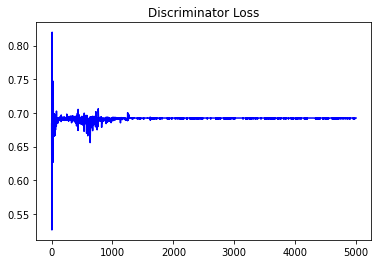

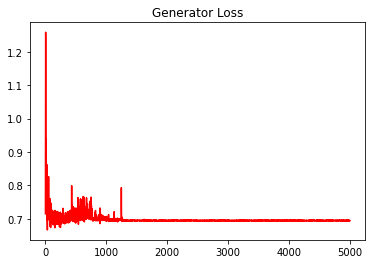

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

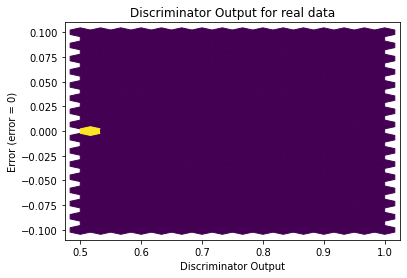

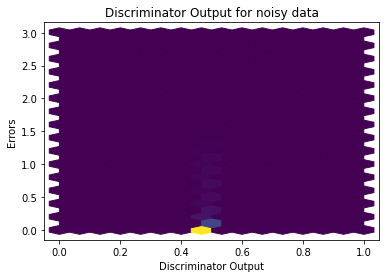

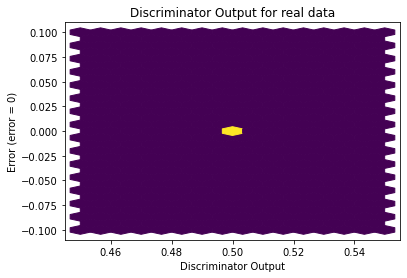

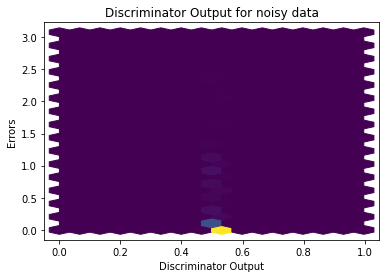

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


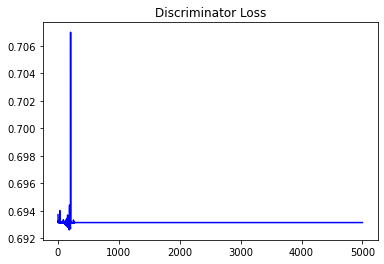

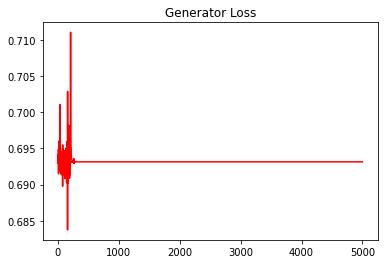

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

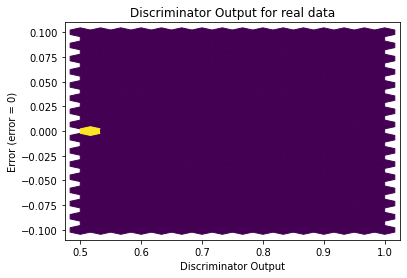

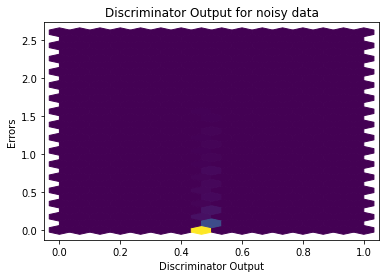

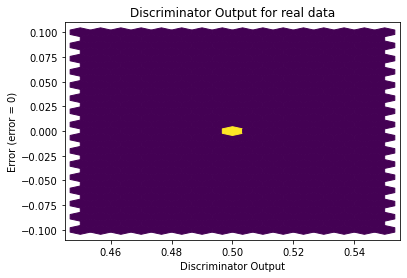

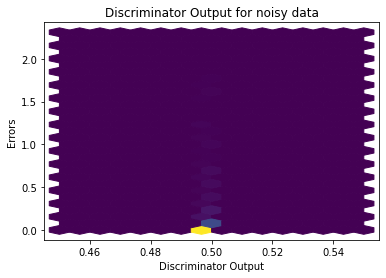

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1225]], device='cuda:0', requires_grad=True)
